In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df_class = df.Outcome.value_counts().to_frame()
df_class

,count
Outcome,
0,500
1,268


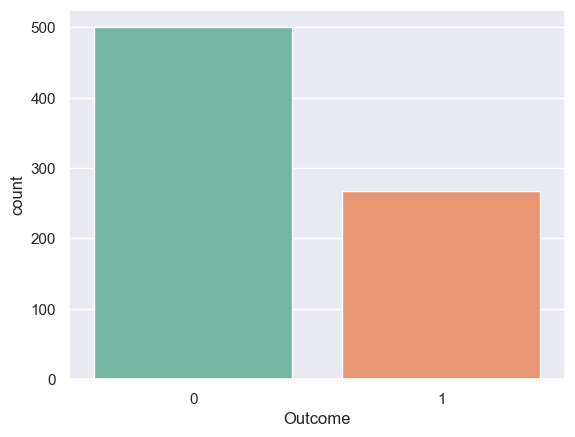

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Outcome", data=df, palette="Set2")

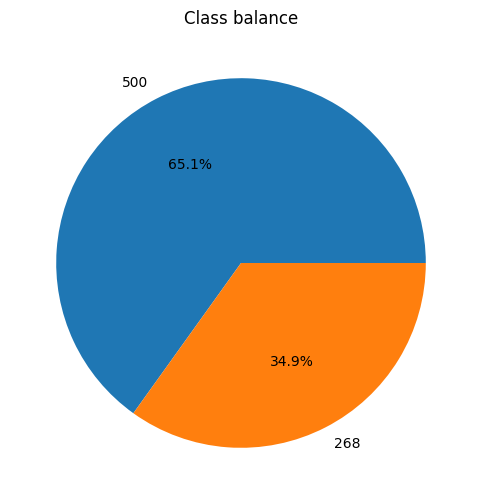

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df_class['Outcome'], labels=df_class['Outcome'], autopct='%1.1f%%')
plt.title('Class balance')
plt.show()

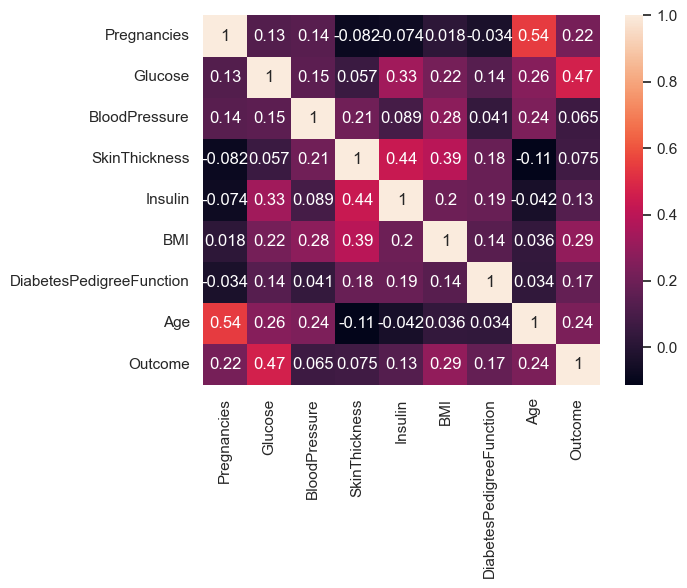

In [8]:
ax = sns.heatmap(df.corr(), annot=True)

1. Glucose, BMI has a low correlation with Outcome.
2. Age has a weak correlation with Outcome
3. Pregnancies and Age have a moderate correlation.
4. Insulin and BMI have a low correlation with SkinThickness.
5. Glucose and Insulin have a low correlation.

<Axes: xlabel='Age', ylabel='Count'>

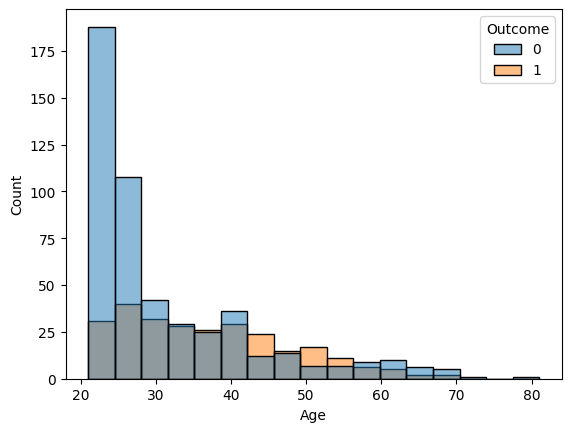

In [ ]:
sns.histplot(data=df, x="Age", hue="Outcome")

Overall classes have relatively close value of age which might indicate that it is not a useful feature. 

<Axes: xlabel='Glucose', ylabel='Count'>

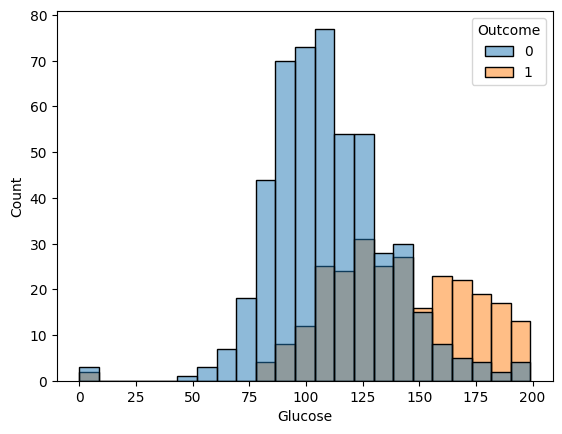

In [ ]:
sns.histplot(data=df, x="Glucose", hue="Outcome")

In [3]:
df[['Glucose','Outcome']]

,Glucose,Outcome
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1




*   Glucose <75 -> all class 0
*   



<Axes: xlabel='BMI', ylabel='Count'>

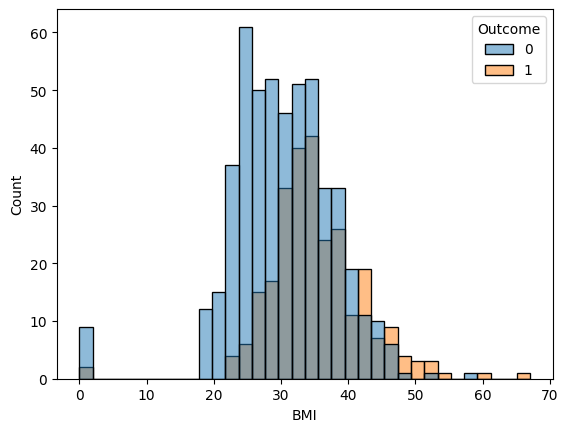

In [ ]:
sns.histplot(data=df, x="BMI", hue="Outcome")

Average BMI ? For those who is over in BMI, 0 or 1?

<Axes: xlabel='Pregnancies', ylabel='Count'>

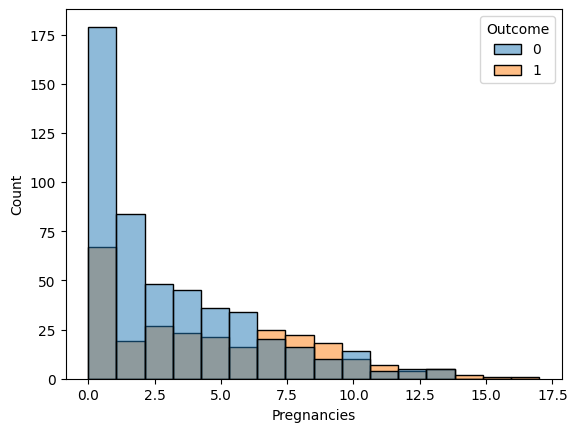

In [ ]:
sns.histplot(data=df, x="Pregnancies", hue="Outcome")

Average times of pregnancies => highers? affect outcome?

<Axes: xlabel='Glucose', ylabel='BMI'>

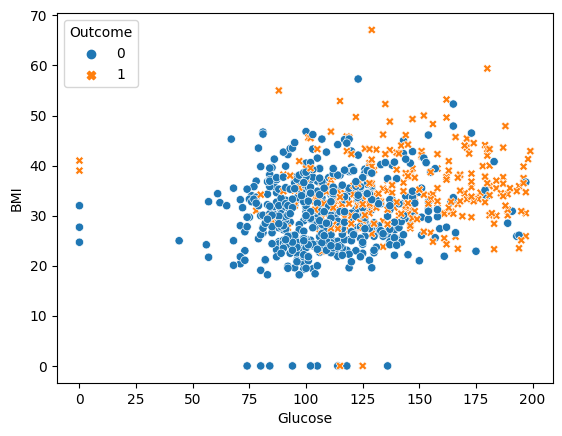

In [ ]:
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome", style="Outcome")

- BMI vs Glucose
- Glucose vs DiabetesPedigreeFunction vs Age

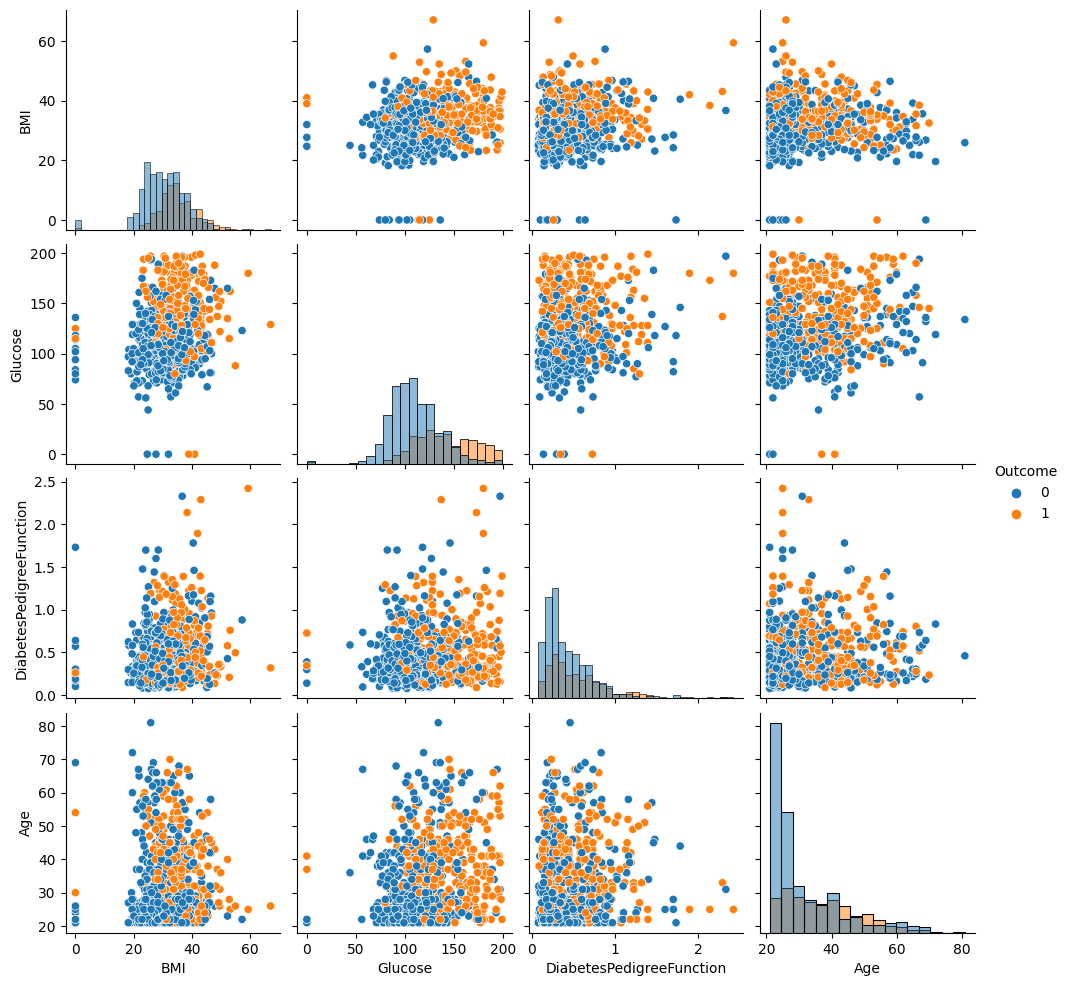

In [ ]:
sns.pairplot(data=df[["BMI","Glucose","DiabetesPedigreeFunction","Age","Outcome"]], hue="Outcome", diag_kind="hist")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X = df[df.columns.drop('Outcome')].to_numpy()
y = df['Outcome'].to_numpy()

# Building Algorithm


## Node

In [5]:
class Node():
    """
    A class representing a node in a decision tree
    """

    def __init__(self, feature = None, threshold = None, left = None, right = None, gain = None, value = None):
        """
        Initializes a new instance of the Node class

        Args:
            feature: The feature used for splitting at this node. Defaults to None
            threshold: The threshold used for splitting at this node. Defaults to None.
            left: The left child node. Defaults to None
            right: The right child node. Defaults to None
            gain: The gain of the split. Defaults to None
            value: If this node is a leaf node, this attribute represents the predicted value for the target
                   variable. Defaults to None
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value


## Model

In [6]:
class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples_split = 2, min_samples_leaf = 1, max_depth = None):
        """
        Constructor for DecisionTree class

        Paraneters:
            min_samples (int): Minimum number of samples required to split an internal node
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.df_tree = pd.DataFrame(columns=['threshold', 'gain', ])

    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix
        y (ndarray): The target values
        """
        # Concatenate X and y vertically
        self.X_train = X
        self.y_train = y
        dataset = np.column_stack((X, y))
        self.root = self.build_tree(dataset)

    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold

        Parameters:
            dataset(ndarray): Input dataset
            feature (int): Index of the feature to be split on
            threshold(float): Threshold value to split the feature on

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold
        """
        # Create empty arrays to store the left and right datasets
        left_dataset = []
        right_dataset = []

        # Loop over each row in the dataset and split based on the given feature and threshold
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        # Convert the left and right datasets to numpy arrays and return
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):
        """
        Computes the entropy of the given label values

        Parameters:
            y(ndarray): Input label values

        Returns:
            entropy(float): Entropy of the given label values
        """
        entropy = 0

        # Find the unique label values in y and loop over each value
        labels = np.unique(y)
        for label in labels:
            # Find the examples in y that have the current label
            label_examples = y[y == label]
            # Calculate the ratio of the current label in y
            pl = len(label_examples)/len(y)
            # Calculate the entropy using the current label and ratio
            entropy += -pl * np.log2(pl)
        # Return the final entropy value
        return entropy

    def information_gain(self, parent, left, right):
        """
        Computes the information gain from splitting the parent dataset into two datasets

        Parameters:
            parent (ndarray): Input parent dataset
            left (ndarray): Subset of the parent dataset after split on a feature
            right (ndarray): Subset of the parent dataset after split on a feature

        Returns:
            information_gain (float): Information gain of the split
        """
        # set initial information gain to 0
        information_gain = 0
        # compute entropy for parent
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left)/len(parent)
        weight_right = len(right)/len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy (average entropy of child nodes)
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain
        information_gain = parent_entropy - weighted_entropy
        return information_gain

    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset

        Args:
        dataset (ndarray): The dataset to split
        num_samples (int): The number of samples in the dataset
        num_features (int): The number of features in the dataset

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain, left and right dataset.

        """
        # dictionary to store the best split values
        best_split = {'gain':0, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    if len(left_dataset)>= self.min_samples_leaf and len(right_dataset)>= self.min_samples_leaf:
                        # get y values of the parent and left, right nodes
                        y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                        # compute information gain based on the y values
                        information_gain = self.information_gain(y, left_y, right_y)
                        # update the best split if conditions are met
                        if information_gain > best_split["gain"]:
                            best_split["feature"] = feature_index
                            best_split["threshold"] = threshold
                            best_split["left_dataset"] = left_dataset
                            best_split["right_dataset"] = right_dataset
                            best_split["gain"] = information_gain
        return best_split

    def calculate_leaf_value(self, y):
        """
        Calculates the most occuring value in the given list of y values

        Args:
            y (list): The list of y values

        Returns:
            The most occuring value in the list.
        """
        y = list(y)
        # get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value

    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to buld the tree from.
        current_depth (int): The current depth of the tree

        Returns:
        Node: The root node of the built decision tree
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples_split and (self.max_depth == None or current_depth <= self.max_depth):
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                print('---'*current_depth,'|---','Feature:',best_split['feature'], '<=', best_split['threshold'])
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                print('---'*current_depth,'|---','Feature:',best_split['feature'], '>', best_split['threshold'])
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"], left_node, right_node, best_split["gain"])
        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        print('---'*current_depth,'|---','Class:',leaf_value)
        # return leaf node value
        return Node(value=leaf_value)

    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        predictions = np.array(predictions)
        self.predictions = predictions
        return predictions

    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None:
            return node.value
        else:
            # if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

## Evaluation

In [7]:
class Evaluation:
    '''
    This is document of Evaluation class.
    Use this class to do some following tasks:

    Methods:
    - '__init__': initializes the class
    - 'combine_parameters': to create combination with different min_samples_split and max_depth
    - 'compare_different_parameters': to compare metrics after running model with each pair of min samples split and max depth
    - 'evaluate_model_single_parameters': to evaluate model with single pair of min samples split and max depth
    - 'run_model': to run Decision tree
    - 'make_evaluation': to calculate metrics
    - 'calculate_accuracy': to compute accuracy of Decision tree
    - 'calculate_recall_score': to compute recall score of Decision tree
    - 'calculate_precision_score': to compute precision score of Decision tree
    - 'calculate_f1_score': to compute f1 score of Decision tree
    '''
    def __init__(self, X_train, y_train, X_test, y_test):
        '''
        '''
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def combine_parameters(self, range_min_samples_split, range_max_depth):
        '''
        This function is to create combination with different min_samples_split and max_depth

        Args:
            range_min_samples_split: (int,float) range of min samples split
            range_max_depth: (int, float) range of max depth

        Returns:
            parameters: (list) pair of min samples split and max depth
        '''
        parameters = []
        for min_samples in range(range_min_samples_split+1):
            for max_depth in range(range_max_depth+1):
                parameters.append(( min_samples, max_depth ))
        return parameters

    def compare_different_parameters(self, range_min_samples_split, range_max_depth):
        '''
        This function is to calculate the accuracy, recall_score, precision_score and f1 score of many k-neighbors

        Args:
            range_min_samples_split: (int, float) range of min samples split
            range_max_depth: (int, float) range of max depth

        Returns:
            df_evaluations: (dataframe) contains metrics evaluation

        '''
        parameters = self.combine_parameters(range_min_samples_split, range_max_depth)
        number_combination = len(parameters)
        # Call model and compute accuracy for each parameter combination
        df_evaluations = pd.DataFrame(columns=['min_samples_split', 'max_depth', 'accuracy', 'recall_score', 'precision_score', 'f1_score'])
        for k in range(number_combination):
            min_samples_split = parameters[k][0]
            max_depth = parameters[k][1]
            # make predictions
            predictions = self.run_model(min_samples_split, 1, max_depth)
            # evaluate model
            list_evaluation = self.make_evaluation(predictions, min_samples_split, max_depth)
            df_evaluations.loc[len(df_evaluations)]= list_evaluation
        return df_evaluations

    def evaluate_model_single_parameters(self, min_samples_split=2, min_samples_leaf=1, max_depth=None):
        '''
        This function is to evaluate model with single pair of min samples split and max depth

        Args:
            min_samples_split: (int, float) min sample split
            min_samples_leaf: (int, float) min sample leaf
            max_depth: (int, float) max depth

        Returns:
            df_evaluations: (dataframe) contains evaluation metrics
        '''
        df_evaluations = pd.DataFrame(columns=['min_samples_split', 'max_depth', 'accuracy', 'recall_score', 'precision_score', 'f1_score'])
        # make predictions
        predictions = self.run_model(min_samples_split, min_samples_leaf, max_depth)
        # evaluate model
        list_evaluation = self.make_evaluation(predictions, min_samples_split, max_depth)
        df_evaluations.loc[len(df_evaluations)]= list_evaluation
        return df_evaluations

    def run_model(self, min_samples_split, min_samples_leaf, max_depth):
        '''
        This function is to run Decision tree

        Args:
            min_samples_split: (int, float) min sample split
            min_samples_leaf: (int, float) min sample leaf
            max_depth: (int, float) max depth

        Returns:
            predictions: (array) predicted labels
        '''
        model = DecisionTree(min_samples_split, min_samples_leaf, max_depth)
        model.fit(self.X_train, self.y_train)
        predictions = model.predict(self.X_test)
        return predictions

    def make_evaluation(self, predictions, min_samples_split, max_depth):
        '''
        This function is to calculate metrics
        '''
        # Compute accuracy
        accuracy = self.calculate_accuracy(self.y_test, predictions)
        # Compute recall
        recall = self.calculate_recall_score(self.y_test, predictions)
        # Compute
        precision = self.calculate_precision_score(self.y_test, predictions)
        # Compute f1_score
        f1 = self.calculate_f1_score(self.y_test, predictions)
        list_evaluation = [min_samples_split, max_depth, accuracy, recall, precision, f1]
        return list_evaluation

    # Calculate accuracy
    def calculate_accuracy(self, y_true, y_pred):
        '''
        This function is to calculate the accuracy of Decision tree model

        Dependencies:
        run_model: this function should be called before calculate_accuracy

        Args:
        y_pred: array of predicted class by model
        y_true: array of actual class we already have

        Returns:
        accuracy: value for the accuracy of model
        '''
        correct_prediction = np.sum(y_pred==y_true)
        accuracy = correct_prediction/y_true.shape[0]
        return(accuracy)

    # Calculate recall score
    def calculate_recall_score(self, y_true, y_pred):
        '''
        This function is to calculate the accuracy of Decision tree model

        Dependencies:
        run_model: this function should be called before calculate_accuracy

        Args:
        y_pred: array of predicted class by model
        y_true: array of actual class we already have

        Returns:
        recall: value for the recall score of model
        '''
        true_positive = sum((pred == true) and (pred == 1) for pred, true in zip(y_pred, y_true))
        false_negative = sum((pred != true) and (pred == 0) for pred, true in zip(y_pred, y_true))
        recall = true_positive/(true_positive + false_negative)
        return(recall)

    # Calculate precision score
    def calculate_precision_score(self, y_true, y_pred):
        '''
        This function is to calculate the precision of Decision tree model

        Dependencies:
        run_model: this function should be called before calculate_accuracy

        Args:
        y_pred: array of predicted class by model
        y_true: array of actual class we already have

        Returns:
        precision: value for the precision score of model
        '''
        true_positive = sum((pred == true) and (pred == 1) for pred, true in zip(y_pred, y_true))
        false_positive = sum((pred != true) and (pred == 1) for pred, true in zip(y_pred, y_true))
        precision = true_positive/(true_positive + false_positive)
        return precision

    # Calculate f1 score
    def calculate_f1_score(self, y_true, y_pred):
        '''
        This function is to calculate the f1 score of Decision tree model

        Dependencies:
        run_model: this function should be called before calculate_accuracy

        Args:
        y_pred: array of predicted class by model
        y_true: array of actual class we already have

        Returns:
        f1_score: value for the f1_score score of model
        '''
        true_positive = sum((pred == true) and (pred == 1) for pred, true in zip(y_pred, y_true))
        false_positive = sum((pred != true) and (pred == 1) for pred, true in zip(y_pred, y_true))
        false_negative = sum((pred != true) and (pred == 0) for pred, true in zip(y_pred, y_true))
        f1_score = true_positive/(true_positive + (false_positive + false_negative)/2)
        return f1_score

## Train test split

In [36]:
def train_test_vali_split(X, y, random_state=41, test_size=0.2, validation_size=0.1):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features)
        y (numpy.ndarray): Target arrray of shape (n_samples)
        random_state (int): Seed for the random number generator. Default is 42
        test_size (float): Proportion of samples to include in the test set. Default is 0.2

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test
    """
    # Get number of shape
    n_samples = X.shape[0]

    # Set the random seed for random generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffle_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test and validation set
    test_size = int(n_samples * test_size)
    validation_size = int(n_samples * validation_size)

    # Split the indices into test and train
    validation_indices = shuffle_indices[:validation_size]
    test_indices = shuffle_indices[validation_size:(validation_size + test_size)]
    train_indices = shuffle_indices[(validation_size + test_size):]

    # Set print options to display values without scientific notation
    np.set_printoptions(suppress=True)

    # Split the features and target arrays into test and train
    X_train, X_test, X_validation = X[train_indices], X[test_indices], X[validation_indices]
    y_train, y_test, y_validation = y[train_indices], y[test_indices], y[validation_indices]

    # Reset print options to default
    #np.set_printoptions(suppress=False)

    return X_train, X_test, X_validation, y_train, y_test, y_validation

## Random

In [85]:
class RandomForest:
    """
    A random forest classifier

    """
    def __init__(self, n_trees=7, max_depth=7, min_samples=2, max_features= None, max_sample = None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.trees = []
        self.max_features = max_features
        self.max_sample = max_sample
    
    def fit(self, X, y):
        # Create an empty list to store the trees
        self.trees = []
        # Concatenate X and y into a single dataset
        dataset = np.concatenate((X,y.reshape(-1,1)), axis=1)
        # Loop over the number of trees
        for _ in range(self.n_trees):
            # Create a decision tree instance
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples) 
            # Sample from the dataset with replacement (boostrapping)
            dataset_sample = self.boostrap_samples(dataset, max_sample=self.max_sample)
            # Subset features of the dataset
            selected_features = self.random_feature_subset(dataset, max_sample_features= self.max_features)
            dataset_sample = dataset_sample[:,selected_features]
            # Get the X and y samples from the dataset sample
            X_sample, y_sample = dataset_sample[:,:-1], dataset_sample[:,-1]
            # Fit the tree to the X and y sample
            X_sample, y_sample = dataset_sample[:,:-1], dataset_sample[:,-1]
            # Fit the tree to the X and y samples
            tree.fit(X_sample, y_sample)
            # Store the tree in the list of trees
            self.trees.append(tree)
        return self
    
    def boostrap_samples(self, dataset, max_sample):
        """
        """
        # Get the number of samples in the dataset
        n_samples = dataset.shape[0]
        # Generate random indices to index into the dataset with replacement
        np.random.seed(1)
        indices = np.random.choice(n_samples, max_sample, replace=True)
        # Return the bootstrapped dataset sample using the generated indices
        dataset_sample = dataset[indices]
        return dataset_sample

    def random_feature_subset(dataset, max_sample_features=None):
        """
        Randomly select a subset of features for each split.

        Parameters:
        - Dataset: Feature matrix (numpy array or pandas DataFrame)
        - percent_subset: Percentage of features to select for each split

        Returns:
        - selected_features: List of selected feature indices
        """

        num_features = dataset.shape[1]
        num_subset = int(max_sample_features)

        # Randomly shuffle the indices of features
        all_feature_indices = np.arange(num_features)
        np.random.shuffle(all_feature_indices)

        # Select a subset of features
        selected_features = all_feature_indices[:num_subset]

        return selected_features
    
    def most_common_label(self, y):
        """
        """
        y = list(y)
        # get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value
    
    def predict(self, X):
        """
        """
        # get prediction from each tree in the tree list on the test data
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # get prediction for the same sample from all trees for each sample in the test data
        preds = np.swapaxes(predictions, 0, 1)
        # get the most voted value by the trees and store it in the final predictions array
        majority_predictions = np.array([self.most_common_label(pred) for pred in preds])
        return majority_predictions
    

In [82]:
max_sample=7
num_subset = int(max_sample)
print(num_subset)

7


In [86]:
n_samples = X_train.shape[0]
boostrap_samples = round(n_samples*0.7)
rf = RandomForest(n_trees=150, max_depth=4, max_features=3, max_sample= boostrap_samples)
rf.fit(X_train, y_train)


TypeError: random_feature_subset() got multiple values for argument 'max_sample_features'

In [58]:
# Assuming X_train is your feature matrix
X_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Call the random_feature_subset function
selected_features = random_feature_subset(X_train, percent_subset=0.7)

# Use the selected features for splitting at a tree node
X_subset = X_train[:, selected_features]
X_subset

array([[2, 1],
       [5, 4],
       [8, 7]])

## Evaluation

In [10]:
def accuracy(y_true, y_pred):
    """
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions/total_samples)

In [62]:
X_train, X_test, X_validation, y_train, y_test, y_validation = train_test_vali_split(X, y, test_size=0.3, validation_size=0)

In [40]:
model = RandomForest(n_trees = 147, max_depth=4)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy(y_test, predictions)

0.7782608695652173

In [43]:
model2 = DecisionTreeClassifier(max_depth=4)
model2.fit(X_train, y_train)

predictions2 = model.predict(X_test)
accuracy(y_test, predictions2)

0.7782608695652173

In [44]:
rf = RandomForestClassifier(n_estimators=148, max_depth=4)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=148)

In [45]:
y_pred = rf.predict(X_test)

In [47]:
accuracy(y_test, y_pred)

0.7434782608695653

In [28]:
y_pred2 = rf.predict(X_validation)
accuracy(y_validation, y_pred2)

0.8157894736842105

In [31]:
len(y_test)

153

In [32]:
len(y_validation)

76

In [33]:
len(X_train)

539

In [34]:
y_pred3 = rf.predict(X_train)
accuracy(y_train, y_pred3)

0.8330241187384044

In [23]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14ea68130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14e91b820>})

In [24]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 148}
